In [34]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

# 1 Regresión Lineal Ordinaria (LSS)

## a)

In [35]:
df = pd.read_csv("kc_house_data.csv",sep = ",",header = 0)
df = df.drop(['id','date','zipcode'], axis=1)

## b)

In [36]:
df.shape

(21613, 18)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


In [38]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## c)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Estandarizacion del dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
a = df['price']
#No entiendo por que se hace este paso
df_scaled['price'] = np.log(df['price'])

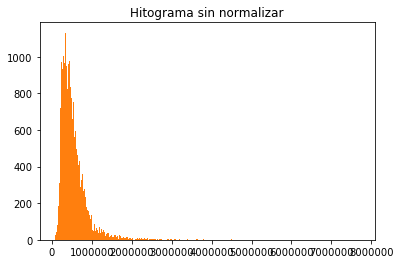

In [40]:
from matplotlib.pylab import hist, show

plt.title("Hitograma sin normalizar")
plt.hist(a,bins='auto')
plt.show()

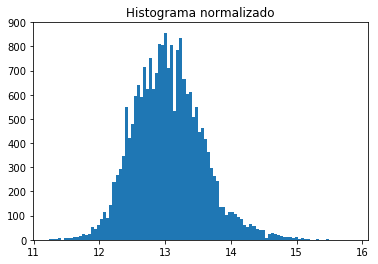

In [69]:
plt.title("Histograma normalizado")
plt.hist(df_scaled["price"], bins=100)
plt.show()

In [43]:
df_scaled.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,13.047817,-1.254167e-15,-1.051951e-15,3.174253e-16,3.281921e-17,-1.753125e-14,1.482989e-15,1.853096e-15,-2.636807e-15,-2.328998e-15,3.892022e-16,-2.022801e-15,3.592925e-15,4.348961e-15,-3.446807e-14,-3.637898e-14,-1.506632e-16,1.235382e-16
std,0.526685,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,11.225243,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.101284e-01,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01
25%,12.682152,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.810785e-01,-2.101284e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01
50%,13.017003,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,1.360059e-01,-2.101284e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01
75%,13.377006,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,-8.717263e-02,-3.057595e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.849999e-01,-2.101284e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02
max,15.856731,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,1.147149e+01,4.914129e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.497813e+00,4.806428e+00,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,12.309982,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,13.195614,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,12.100712,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,13.311329,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,13.142166,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849
5,14.018451,0.676485,3.097133,3.636791,2.096185,-0.915427,-0.087173,-0.305759,-0.629187,2.844170,2.537955,2.798440,1.021181,-0.210128,0.693181,1.483375,4.046611,3.265566
6,12.458775,-0.398737,0.175607,-0.397313,-0.200098,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.088628,-0.658681,0.816910,-0.210128,-1.806810,-0.803149,0.366876,-0.217900
7,12.583995,-0.398737,-0.798235,-1.110494,-0.130276,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.879623,-0.658681,-0.272536,-0.210128,-1.086547,-0.717937,-0.491048,-0.111980
8,12.343658,-0.398737,-1.447464,-0.326539,-0.184381,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.891699,0.990795,-0.374672,-0.210128,-0.344633,-0.874160,-0.301371,-0.170507
9,12.685408,-0.398737,0.500221,-0.206768,-0.206351,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.122706,-0.658681,1.089271,-0.210128,-1.383168,1.298749,0.588652,-0.190395


## d)

In [44]:
#Se guarda en la variable X todo el dataset menos la columna "price"
X = df_scaled.iloc[:,1:]
#Se registra la cantidad de filas en la variable N
N = X.shape[0]
# Se le agrega al dtaframe X la columna "intercept" llena de 1
X.insert(X.shape[1], 'intercept', np.ones(N))
# Se gusrda la columna "price" del dataframe estandarizado en y
y = df_scaled['price']
# Se crea un vector de 0 del largo del dataframe X
mask = np.zeros(len(X))
# Se crea la variable limit con el 70% del largo del dataframe X
limit = int(len(X)*0.7)
# Se setea con el valor 1 de 0 hasta limit los campos del vector mask
mask[:limit] = 1
# Se crea un vector que indica si la data es de entrenamiento o no
istrain = mask == 1
# Se genera la data de etrenamiento usando el vector istrain aplicado a X e y
Xtrain = X[istrain]
ytrain = y[istrain]
# Se genera la data de test con el 30% restante de X e y
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
#Se hace la regresion lineal usando los datos de entrenamiento
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
#Coeficientes obtenidos con la regresion sobre los datos de entrenamiento
print('Coeficientes: \n', linreg.coef_)

Coeficientes: 
 [ -1.03138941e-02   5.50422359e-02  -1.29091961e+12   2.13839544e-02
   3.81170681e-02   3.33354684e-02   4.20039469e-02   4.55363560e-02
   1.86245389e-01   1.16392779e+12   6.22063766e+11  -1.09985352e-01
   1.48315430e-02   1.85791016e-01  -4.53186035e-03   8.59985352e-02
  -6.34765625e-03   1.30396271e+01]


In [45]:
# Precision de la prediccion 
linreg.score(Xtest,ytest)

0.76301876915523459

## e) Pesos y Z-score

In [46]:
import scipy as sc
from scipy import stats
from numpy import linalg

Tenemos que los pesos asignados a cada variable serán los coeficientes $\hat{\beta}$ estimados en los puntos anteriores mediante el metodo de minimos cuadrados. Por otro lado tenemos que los Z-Score se obtienen siguien $\displaystyle z_i = \frac{\hat{\beta_i}}{\sigma_i\sqrt{v_i}}$, donde $v_i$ es el elemento $i-esimo$ de la diagonal de la maytiz $(X^tX)^{-1}$

In [70]:
#Se carga el dataframe en una matriz para poder trabajar con los datos
X = np.array(df_scaled)
#Se guarda la traspuesta de la matriz 
Xt = np.transpose(X)
#se computa el producto matricial entre la Xt y X 
XtX = np.dot(Xt,X)
# Se calcula la inversa de XtX
V = np.linalg.inv(XtX)
# Se guarda la diagonal de la matriz
Vdiag = np.diag(V)
#Se obtienen los coeficientes
betas = linreg.coef_
#se obtiene la desviacion estandar para cada variable
sigma = df_scaled.std()
#Se calculan los z-score
Zscore = betas/(sigma*np.sqrt(Vdiag))

C:\Users\horth_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in sqrt


In [102]:
#names_regressors = np.array(["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long","sqft_living15","sqft_lot15"])
print("       Pesos","    z-score")
pd.Series(np.array(Zscore),betas)

       Pesos     z-score


-1.031389e-02   -3.757073e+01
 5.504224e-02    6.302868e+00
-1.290920e+12   -1.036907e+14
 2.138395e-02             NaN
 3.811707e-02    3.864532e+00
 3.333547e-02    3.470172e+00
 4.200395e-02    5.628862e+00
 4.553636e-02    5.611293e+00
 1.862454e-01    2.464924e+01
 1.163928e+12    9.261907e+13
 6.220638e+11             NaN
-1.099854e-01             NaN
 1.483154e-02    1.410079e+00
 1.857910e-01    2.547256e+01
-4.531860e-03   -6.284839e-01
 8.599854e-02    1.031757e+01
-6.347656e-03   -5.430219e-01
 1.303963e+01    1.311778e+03
dtype: float64